BACKTEST -----------------------
WR: 57.00% | ROI: 6.06% | Drawdown: 0.00%
MedGain: 0.86 | MedLoss: -1.00 | EV: 0.04

REALIDADE -----------------------
WR: 35.29% | ROI: -31.00% | Drawdown: -7.25%
MedGain: 0.95 | MedLoss: -1.00 | EV: -0.31

Profit: -5.27 | Entradas: 17
Dias: 17 (45 totais)


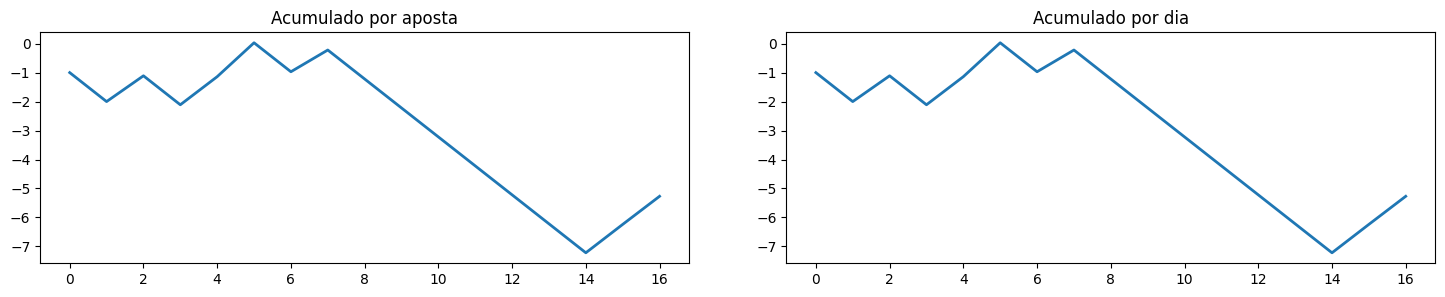


Por Mês --------------------------------------


,Date,Total_Profit,Qtd_Games,ROI
0,2023-11-30,-1.14,5,-0.23
1,2023-12-31,-5.10,11,-0.46
2,2024-01-31,0.97,1,0.97



Dias --------------------------------------


,Date,Total_Profit,Qtd_Games,Acumulado
0,2023-11-20,-1.00,1,-1.00
1,2023-11-24,-1.00,1,-2.00
2,2023-11-26,0.89,1,-1.11
3,2023-11-28,-1.00,1,-2.11
4,2023-11-30,0.97,1,-1.14
5,2023-12-05,1.17,1,0.03
6,2023-12-09,-1.00,1,-0.97
7,2023-12-13,0.75,1,-0.22
8,2023-12-15,-1.00,1,-1.22
9,2023-12-17,-1.00,1,-2.22



Jogos -------------------------------------


,Date,Home,Away,Home_Pts,Away_Pts,Odds_H,Resultado,Profit,Acumulado
0,2023-11-20,Chicago Bulls,Miami Heat,100,118,2.11,red,-1.00,-1.00
1,2023-11-24,Baskonia,Monaco,75,77,2.14,red,-1.00,-2.00
2,2023-11-26,Los Angeles Clippers,Dallas Mavericks,107,88,1.89,green,0.89,-1.11
3,2023-11-28,Abejas,Fuerza Regia,74,94,1.99,red,-1.00,-2.11
4,2023-11-30,Minnesota Timberwolves,Utah Jazz,101,90,1.97,green,0.97,-1.14
5,2023-12-05,Al Ahli,Al Wakrah,92,70,2.17,green,1.17,0.03
6,2023-12-09,Incarnate Word,Northern Arizona,75,76,2.23,red,-1.00,-0.97
7,2023-12-13,Toronto Raptors,Atlanta Hawks,135,128,1.75,green,0.75,-0.22
8,2023-12-15,Toronto Raptors,Atlanta Hawks,104,125,1.77,red,-1.00,-1.22
9,2023-12-17,TNT Tropang Giga,San Miguel Beermen,93,98,2.01,red,-1.00,-2.22


In [1]:
import pandas as pd; pd.set_option('display.max_columns', None)
import pandas as pd; pd.set_option('display.max_rows', None)
import glob
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

import sys
sys.path.append('scripts/')
from Acompanhamento import *
METODO = 'back_home_v1'
TARGET = 'Back_Home'
ODDS = 'Odds_H'
SPREAD = 1
STAKE = 1


# Dados de backtest
wr = 57
roi = 6.06
drawdown = 0
med_gain = 0.86
med_loss = -1.00
ev = 0.04
df_all = pd.DataFrame()
dias = glob.glob('apostas_do_dia/*')

for dia in dias:
    dia = dia.split('\\')[1]
    dia = dia.split('.')[0]
    caminho = glob.glob(f'apostas_do_dia/{dia}/*{METODO}*')
    if len(caminho) == 0:
        continue
    caminho = caminho[0]
    df = pd.read_csv(caminho)
    df_all = pd.concat([df_all, df])

temp = pd.read_csv('data/Entire_Season.csv')
df_all = pd.merge(df_all, temp[['Date', 'Home', 'Away', 'Home_Pts', 'Away_Pts']], on=['Date', 'Home', 'Away'], how='left')
df_all = df_all.dropna(subset=['Home_Pts', 'Away_Pts'])
df_all['Home_Pts'] = df_all['Home_Pts'].astype(int)
df_all['Away_Pts'] = df_all['Away_Pts'].astype(int)

df_all.loc[(df_all['Home_Pts'] < df_all['Away_Pts']), TARGET] = 0
df_all.loc[(df_all['Home_Pts'] >= df_all['Away_Pts']), TARGET] = 1

df_all.loc[(df_all[TARGET] == 0), 'Profit'] = - STAKE
df_all.loc[(df_all[TARGET] == 1), 'Profit'] = ((df_all[ODDS] * SPREAD) - 1) * STAKE
df_all['Profit'] = df_all['Profit'].round(2)

print('BACKTEST -----------------------')
print(f'WR: {wr:.2f}% | ROI: {roi:.2f}% | Drawdown: {drawdown:.2f}%')
print(f'MedGain: {med_gain:.2f} | MedLoss: {med_loss:.2f} | EV: {ev:.2f}')

print('\nREALIDADE -----------------------')
df_odds, df_by_day = get_results(df_all, TARGET, ODDS)